# Домашнее задание 2

**Срок сдачи:** 23 октября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте **фамилию** в названии файла, и тему письма оформляйте в следующем формате: <br\>
** [Maйнор 2016] ДЗ2 **<br\>

Прочтите статью ["USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION"](https://www.dropbox.com/s/054unjn4bfo0khj/STUDENT%20ALCOHOL%20CONSUMPTION.pdf?dl=0), загрузите [датасет](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и выполните следующие задания:

# Работа с данными (4 балла)
- Приведите описание признаков датасета на русском языке с указанием типа данных (1 балла)
- Предобработка данных (3)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (1)
    - Подсчитайте количество записей, у которых признак Medu имеет значение "4" (1)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значение (1)

# 1. Загрузка данных и описание признаков датасета

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## 1.1 Загрузка данных

In [2]:
# loading data from csv
stud_math = pd.read_csv("student/student-mat.csv", sep=";")
stud_port = pd.read_csv("student/student-por.csv", sep=";")

In [3]:
def checkIfGroupedDup(data_list, gr_subs):
    return np.any(data_list.duplicated(subset=gr_subs))

In [4]:
# from student-merge.R
grouping_subset = ["school",
                   "sex",
                   "age",
                   "address",
                   "famsize",
                   "Pstatus",
                   "Medu",
                   "Fedu",
                   "Mjob",
                   "Fjob",
                   "reason",
                   "nursery",
                   "internet"]

In [5]:
all_students = pd.concat([stud_math, stud_port])

print("Are there any duplicates? ", checkIfGroupedDup(all_students, grouping_subset))

all_students = all_students.groupby(grouping_subset).min().reset_index()

print("And after groupped concat? ", checkIfGroupedDup(all_students, grouping_subset))
print("Total unique student number: ", all_students.shape[0])

Are there any duplicates?  True
And after groupped concat?  False
Total unique student number:  662


# описание почему минимум

## 1.2 Описание признаков датасета

| Признак | Описание признака | Тип данных | Диапазон значений | Пояснение |
| :-: | :-: | :-: | :-: |  :-: |
| school | место учебы ученика | бинарный | (GP/MS) | школа Gabriel Pereira или Mousinho da Silveira |
| sex | пол ученика | бинарный | (M/F) | М - мужской, F - женский |
| age | возраст ученика | числовой | 15 - 22 |  |
| address | адрес проживания ученика | бинарный | (U/R) | городской(U), или сельский адрес(R) | 
| famsize | размер семьи ученика| бинарный | (LE3/GT3) | до 3(LE3), больше 3 (GT3) | 
| Pstatus | статус проживания родителей ученика | бинарный | (T/A)| вместе(T), или раздельно (A)| 
| Medu | уровень образования матери ученика | числовой | 0-4 | 0 - нет, 1 - начальное, 2 - 2-5 класс, 3 - среднее, 4 - высшее|
| Fedu | уровень образования отца ученика | числовой | 0-4 | 0 - нет, 1 - начальное, 2 - 2-5 класс, 3 - среднее, 4 - высшее|
| Mjob | место работы матери ученика | номинальный | teacher/health/services/at home/other | преподаватель, медицинский работник, административный работник, работает на дому, другое |
| Fjob | место работы отца ученика | номинальный | teacher/health/services/at home/other | преподаватель, медицинский работник, административный работник, работает на дому, другое |
| reason | причина выбора школы | номинальный | home/reputation/course/other| по причине близости к школе, хорошей репутации, выбора предметов и другое |
| guardian | опекун ученика | номинальный | mother/father/other | мать, отец, другое |
| traveltime | длительность дороги до школы | числовой | 1 - 4 | 1 - до 15 минут, 2 - от 15-30 минут, 3 - 30-60 минут, 4 - больше 60 минут |
| studytime | количество времени, затрачиваемого учеником на учебу в неделю | числовой | 1 - 4 | 1 - меньше 2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - больше 10 часов |
| failures | количество неудач в прошлых классах | числовой | 1 - 4 | 1 - 3, в случае, если количество 1 <= количество неудач <=3, 4 в противном случае |
| schoolsup | дополнительная образовательная помощь | бинарный | (yes/no) | yes -  да, no - нет |
| famsup | дополнительная образовательная помощь от родителей | бинарный | (yes/no) | yes -  да, no - нет |
| paid | дополнительные платные курсы по предметам | бинарный | (yes/no) | yes -  да, no - нет |
| activities | участие во внеклассных активностях | бинарный | (yes/no) | yes -  да, no - нет |
| nursery | посещение мед училища | бинарный | (yes/no) | yes -  да, no - нет |
| higher | желание продолжить обучение в ВУЗ-е | бинарный | (yes/no) | yes -  да, no - нет |
| internet | доступ к интернету дома | бинарный | (yes/no) | yes -  да, no - нет |
| romantic | наличие любовных отношений | бинарный | (yes/no) | yes -  да, no - нет |
| famrel | уровень семейных отношений | числовой | 1 - 5 | 1 - очень плохие отношения в семье, 5 - отличные отношения в семье |
| freetime | количество свободного времени после школы | числовой | 1 - 5 | 1 - очень мало 5 - очень много |
| goout | частота прогулок с друзьями | числовой | 1 - 5 | 1 - очень редко, 5 - очень часто |
| Dalc | количество алкоголя, потребляемого учеником в будни | числовой | 1 - 5 | 1 - очень мало, 5 - очень много |
| Walc | количество алкоголя, потребляемого учеником в выходные | числовой | 1 - 5 | 1 - очень мало, 5 - очень много |
| health | текущий уровень здоровья | числовой | 1 - 5 | 1 - очень плохое, 5 - очень хорошее |
| absences | количество пропусков занятий | числовой | 0 - 93 | |
| G1 | оценка в первом периоде | числовой | 0 - 20 | математике, или по португальскому языку |
| G2 | оценка во втором периоде | числовой | 0 - 20 | математике, или по португальскому языку |
| G3 | оценка в третьем периоде | числовой | 0 - 20 | математике, или по португальскому языку |

## 1.3* Гистограмма каждого признака

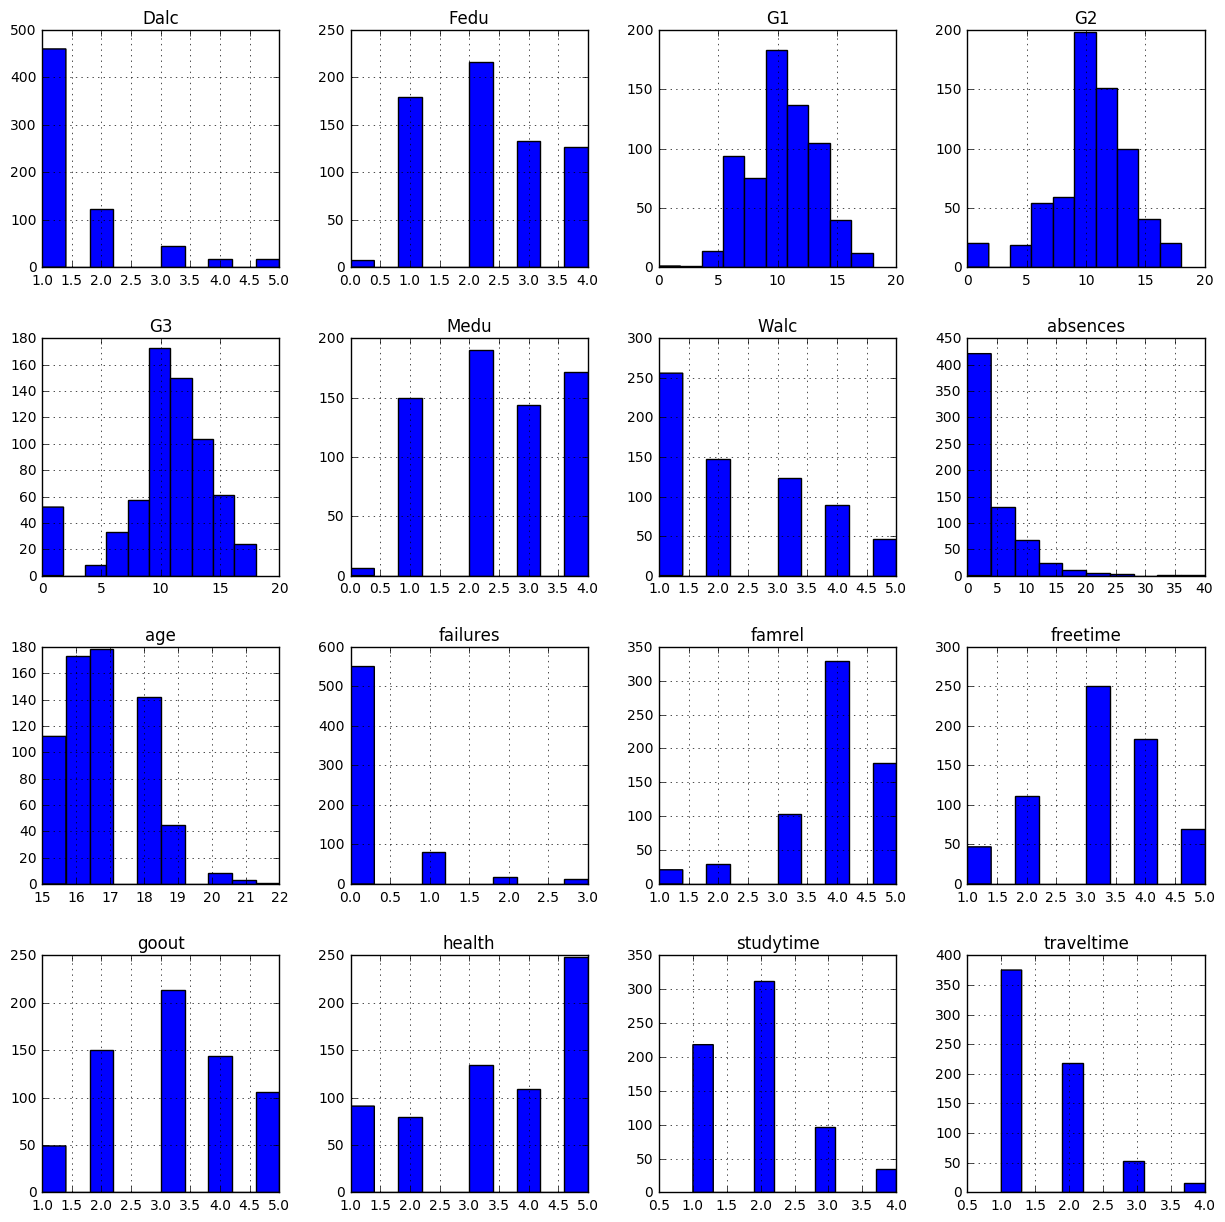

In [6]:
all_students.hist(figsize=(15, 15));

# 2. Предобработка данных

## 2.1 Проверка наличия пропусков.

In [7]:
print("Есть ли пропуски в датафрейме?: ", all_students.isnull().values.any())

Есть ли пропуски в датафрейме?:  False


## 2.2 Подсчет количества записей, у которых признак Medu имеет значение "4"

In [8]:
print("Кол-во записей с Medu = 4: ", np.sum(all_students['Medu'] == 4))

Кол-во записей с Medu = 4:  172


## 2.3 Преобразование признаков

In [9]:
# обработка номинальных признаков
nom_df = all_students[["Mjob", "Fjob",'reason', "guardian"]]
all_students = all_students.drop(nom_df.columns, axis=1)
nom_df = pd.get_dummies(nom_df)
all_students = pd.concat([all_students, nom_df], axis = 1)

In [10]:
# преобразование бинарных признаков
def binarize(df, cols):
    df2 = df.copy()
    for col in cols:
        b_values = df[col].unique()
        split_dict = {b_values[0] : 1, b_values[1] : 0}
        df2[col] = df[col].map(split_dict)
    return df2

In [11]:
binarize_col_names = ["school", "sex", "address", "famsize", "Pstatus", "schoolsup", 
                      "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
all_students = binarize(all_students, binarize_col_names)

In [12]:
# создание целевого признака - потребления алкоголя в месяц // формула из pdf-ки
all_students["alc"] = all_students.apply(lambda row: 1 if int((row['Walc']*2 + row['Dalc']*5)/7) >= 3 else 0, axis=1)
all_students = all_students.drop(['Walc', 'Dalc'], axis = 1)

In [13]:
# мб тут 1-5 преобразую

## Классификация (6 баллов)

### Предписания
- Используйте accuracy как основную меру качества
- Классы в задаче несбалансированные. Для корректной кросс-валидации используйте стратифицированный способ разбиения на фолды [Stratified K-fold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

### Задание
1. Задайте RANDOM_SEED и случайным образом разделите выборку на обучающую и контрольную в пропорции 80/20. Этот же RANDOM_SEED используйте при кросс-валидации (0.5 балла)
2. Random Forest (2 балла)
    - В статье описано использование Random Forest для предсказания важности фактором вляющих на потребление алкоголя.
    - Повторите эксперимент с использованием [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры с помощью кросс-валидации. (1 балл)
    - Изобразите аналогичную таблицу важности признаков для наилучшей настройки метода (значения могут отличаться). (0.5 балла)
    - Укажите значение accuracy для пяти наилучших настроек метода на контрольной выборке. (0.5 балла)

3. GradientBoosting (2 балла)
    - Обучите [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры с помощью кросс-валидации. (0.5 балла)
    - Изобразите таблицу важности признаков для наилучшей настройки метода. Отличается ли она от таблицы метода RandomForest. Почему? (1 балл)
    - Укажите значение accuracy для пяти наилучших настроек метода. (0.5 балла)

4. AdaBoost (1 балл)
    - Обучите [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) и найдите для него наилучшие параметры с помощью кросс-валидации. (0.5 балла)
    - Укажите значение accuracy для наилучших настроек метода. (0.5 балла)

5. Какой из классификаторов оказался лучше? (0.5 балла)

# 3. Train test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
RANDOM_SEED = 3491
y = all_students["alc"]
X = all_students.drop("alc", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = RANDOM_SEED)

In [16]:
def top_score_print(n, cv_res, key):
    result = cv_res[key]
    indexes = result.argsort()[-n:][::-1]
    for i, index in enumerate(indexes):
        print ('#{} Accuracy is -- {}'.format(i + 1, result[index]))

In [38]:
def top_importance_print(n, importances, importances_names):
    indexes = importances.argsort()[-n:][::-1]
    for i, index in enumerate(indexes):
        print ('#{} Important feature is -- {} with {:.2f} importance'.format(i + 1, importances_names[index], importances[index]))

# 4. Random Forest

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [19]:
kf = StratifiedKFold(n_splits = 5, random_state=RANDOM_SEED)
param = {"criterion":["gini", "entropy"], "max_features":[1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, "log2", "auto"],
         "max_depth":[2, 4, 8, 16, 32, 64], "class_weight":[None, "balanced"]}
cv = GridSearchCV(RandomForestClassifier(), param, scoring="accuracy", n_jobs = -1, cv=kf)
cv.fit(X_train, y_train);
print("Найденое значение: ", cv.best_score_)
print("Найденные параметры: ", cv.best_params_)
print("Значение на тестовой выборке: ", accuracy_score(y_test, cv.predict(X_test)))

Найденое значение:  0.894139886578
Найденные параметры:  {'class_weight': 'balanced', 'max_features': 3, 'max_depth': 64, 'criterion': 'entropy'}
Значение на тестовой выборке:  0.857142857143


In [20]:
print("Таблица топ 5 accuracy: ")
top_score_print(5, cv.cv_results_, "mean_test_score")

Таблица топ 5 accuracy: 
#1 Accuracy is -- 0.8941398865784499
#2 Accuracy is -- 0.8922495274102079
#3 Accuracy is -- 0.8922495274102079
#4 Accuracy is -- 0.8903591682419659
#5 Accuracy is -- 0.8903591682419659


In [39]:
print("Таблица важности признаков")
top_importance_print(10, cv.best_estimator_.feature_importances_, all_students.columns)

#1 Important feature is -- G3 with 0.07 importance
#2 Important feature is -- sex with 0.06 importance
#3 Important feature is -- goout with 0.06 importance
#4 Important feature is -- G2 with 0.06 importance
#5 Important feature is -- freetime with 0.05 importance
#6 Important feature is -- health with 0.05 importance
#7 Important feature is -- famrel with 0.05 importance
#8 Important feature is -- absences with 0.05 importance
#9 Important feature is -- G1 with 0.04 importance
#10 Important feature is -- Fedu with 0.04 importance


### Замечания

- В работе следует использовать библиотеку scikit-learn версии 0.18 и scipy версии 0.18.1
- Используйте данный Ipython Notebook при оформлении домашнего задания.